# 1.BUSINESS UNDERSTANDING

## 1.1 BUSINESS OVERVIEW

In today's society social media is widely used by people to express their opinion on different brands and products, which can influence other people opinion on the product which will lead to an impact on the company's reputation.

Social media platform such as Twitter has become an open space for people where they leave their opinion on their products, these tweets reveal how the customers feel about their products which will make the companies to understand their customers and improve their products to increase the customers satisfaction.

## 1.2 PROBLEM OVERVIEW

The social media platform is a good space for customers and companies to communicate, but it has greatly affected some companies due to negative reviews from customers.

Businesses need to understand their customers opinions, thus their many comments, and it will be difficult to analyze them all which is time consuming, but by solving this, companies can detect negative emotions early and respond quickly to protect their brand image.

This project uses natural language processing techniques to analyze and classify customer emotions toward brands and products.

## 1.3 BUSINESS UNDERSTANDING

### 1.3.1 MAIN OBJECTIVE

The goal of this project is to analyze customers views on Apple and Google products using NLP.

### 1.3.2 SPECIFIC OBJECTIVE

1.  Understand how people feel about Apple and Google products.
2.  To determine which brands have the most positive or negative emotional expressed.
3.  To analyze the common words used in positive and negative comments.
4.  To visualize the customers emotions in the brands.
5.  To clasify if a comment is positive, negative or neither



### 1.3.2 RESEARCH QUESTIONS

1. Which emotion is the most common in each brand and product.
2. Which brand receive the most positive, negative or neutral comment.
3. which tweet text is used in the positive, negative or neutral comment
4. If the Apple and Google product are loved or not.
5. If we can predict the outcome for each tweet text.

### 1.3.3 SUCCESS CRITERIA

Build an analysis model that would achieve a more precise prediction on the customers emotions and to visualize the customers feedback to see the trend in the comments.

# 2. DATA UNDERSTANDING

- The data was gotten from data.world(https://data.world/crowdflower/brands-and-product-emotions/workspace/file?filename=judge-1377884607_tweet_product_company.csv).
- It contains 3 columns and 9,093 rows.
- The dataset consists of strings such as customers comments, product or brand and customers emotions dated back in 2013
- The column names are:
 1. `Tweet text` - The customers comments.
 2. `Emotion_in_tweet_is_directed_at` - The brand or product mentioned in the text.
 3. `Is_there_an_emotion_directed_at_a_brand_or_product` - the customers emotion on the brand or product.

### Importing Libraries

In [2]:
#Basic imports
import pandas as pd
import numpy as np
#Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
#Text cleaning imports
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from scipy.sparse import hstack
#Modeling and evaluation imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [3]:
#load data
df=pd.read_csv("judge-1377884607_tweet_product_company.csv", encoding='latin1')
df.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


In [4]:
#Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [5]:
#descriptive statistics
df.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [6]:
# Create numeric columns
df['tweet_length'] = df['tweet_text'].astype(str).apply(len)
df['word_count'] = df['tweet_text'].astype(str).apply(lambda x: len(x.split()))
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,tweet_length,word_count
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127,23
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139,22
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79,15
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82,15
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131,17


###  EXPLORATORY DATA ANALYSIS

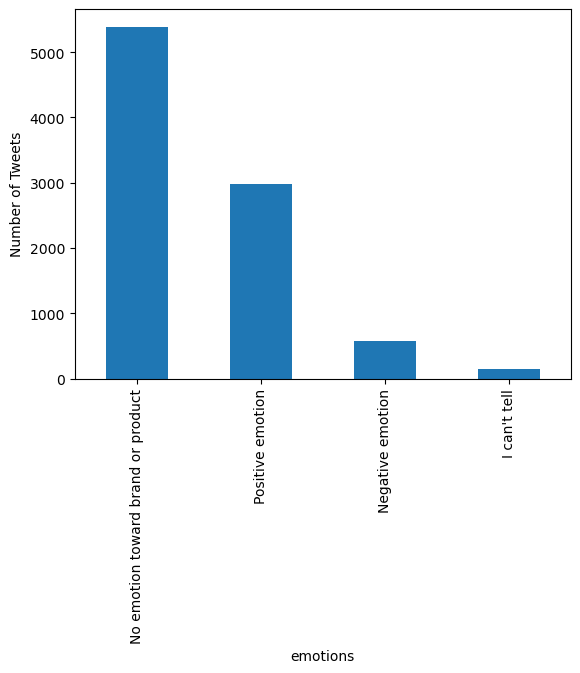

In [7]:
#Shows how many positive, negative and neutral emotion
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts().plot(kind='bar')
plt.xlabel('emotions')
plt.ylabel('Number of Tweets')
plt.show()

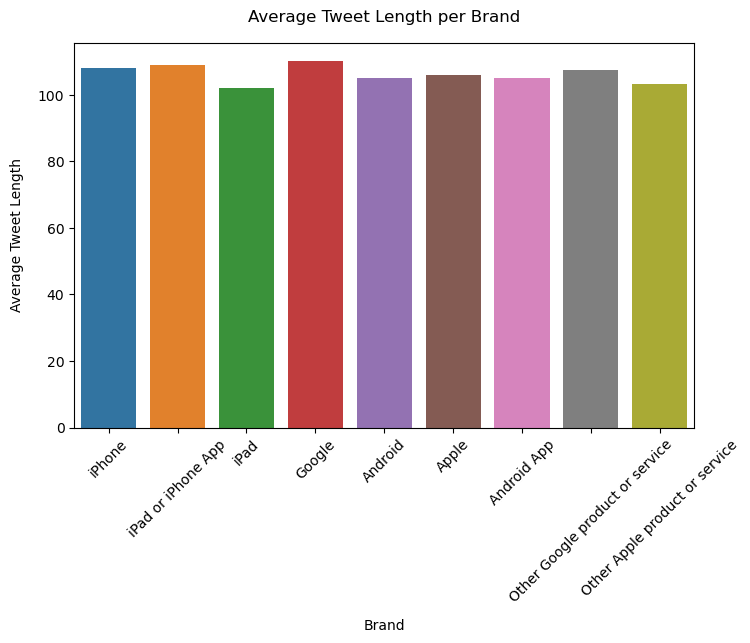

In [8]:
# compares average tweet length for each brand.
plt.figure(figsize=(8,5))
sns.barplot(
    x='emotion_in_tweet_is_directed_at',
    y='tweet_length',
    data=df,
    estimator='mean',
    errorbar=None
)
plt.title('Average Tweet Length per Brand', pad=15)
plt.xlabel('Brand', labelpad=10)
plt.ylabel('Average Tweet Length', labelpad=10)
plt.xticks(rotation=45)
plt.show()


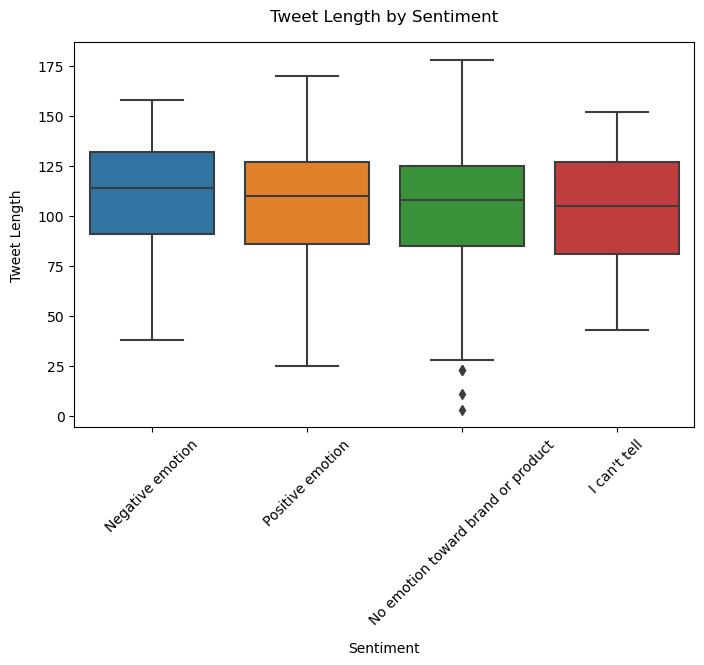

In [9]:
#Boxplot that shows distribution of tweet lengths by sentiment .
plt.figure(figsize=(8,5))
sns.boxplot(
    x='is_there_an_emotion_directed_at_a_brand_or_product',
    y='tweet_length',
    data=df
)
plt.title('Tweet Length by Sentiment', pad=15)
plt.xlabel('Sentiment', labelpad=10)
plt.ylabel('Tweet Length', labelpad=10)
plt.xticks(rotation=45)
plt.show()


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


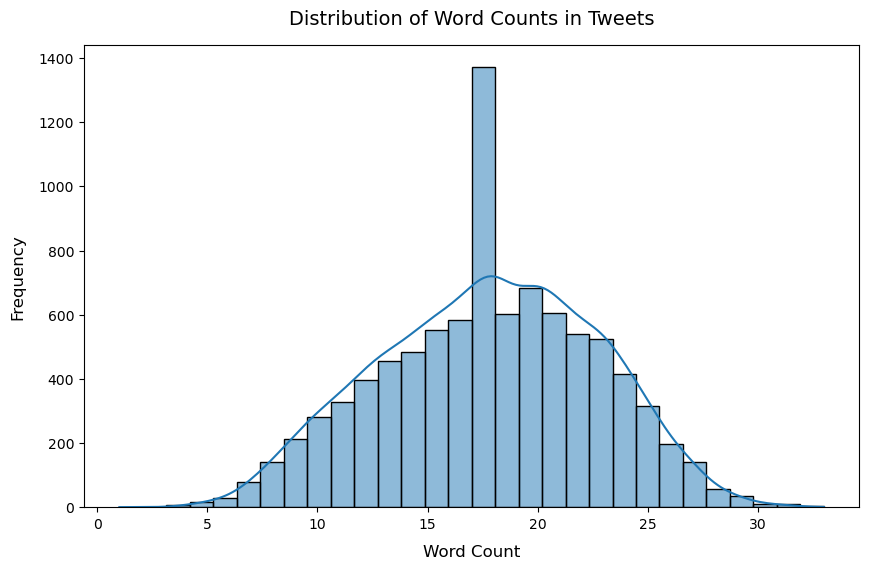

In [10]:
#shows how the number of words varies across all tweets.
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title('Distribution of Word Counts in Tweets', fontsize=14, pad=15)
plt.xlabel('Word Count', fontsize=12, labelpad=10)
plt.ylabel('Frequency', fontsize=12, labelpad=10)
plt.show()


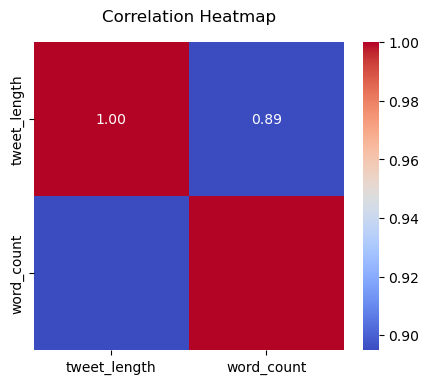

In [11]:
# shows reveals how numeric features are related. 
plt.figure(figsize=(5,4))
sns.heatmap(
    df[['tweet_length', 'word_count']].corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Correlation Heatmap', pad=15)
plt.show()


# 3. DATA PREPARATION

### duplicated values

In [12]:
#Checking duplicates
df.duplicated().sum()


22

In [13]:
#remove duplicates
df.drop_duplicates(subset=['tweet_text'],inplace=True)

### Missing Values

In [14]:
#checking missing values
df.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5786
is_there_an_emotion_directed_at_a_brand_or_product       0
tweet_length                                             0
word_count                                               0
dtype: int64

### Text Cleaning

In [15]:
#Define stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [16]:
#Clean text
def clean_text(text):
#Remove urls, hashtags, mentions, numbers, punctuation
    text = re.sub(r"http\S+", "", text)  
    text = re.sub(r"@\w+|#\w+", "", text)  
    text = re.sub(r"[^a-zA-Z\s]", "", text) 

    #Convert to lowercase
    text = text.lower()  

    #Handle extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    #Tokenize
    tokens = word_tokenize(text)

    #Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Join back into string          
    cleaned_text= " ".join(tokens)
    
    return cleaned_text

In [17]:
#apply text cleaning
df['clean_text'] = df['tweet_text'].astype(str).apply(clean_text)

In [18]:
#Check results
print(df[['tweet_text', 'clean_text']].head(10))

                                          tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   
5  @teachntech00 New iPad Apps For #SpeechTherapy...   
6                                                NaN   
7  #SXSW is just starting, #CTIA is around the co...   
8  Beautifully smart and simple idea RT @madebyma...   
9  Counting down the days to #sxsw plus strong Ca...   

                                          clean_text  
0  g iphone hr tweeting dead need upgrade plugin ...  
1  know awesome ipadiphone app youll likely appre...  
2                                     wait also sale  
3     hope year festival isnt crashy year iphone app  
4  great stuff fri marissa mayer google tim oreil...  
5   new ipad apps communication showcased conference 

### Feature engineering

In [19]:
# Create Brand Categories
brand_mapping = {
    'iPad': 'Apple',
    'Apple': 'Apple',
    'iPad or iPhone App': 'Apple',
    'iPhone': 'Apple',
    'Other Apple product or service': 'Apple',
    'Google': 'Google',
    'Other Google product or service': 'Google',
    'Android App': 'Google',
    'Android': 'Google'
}

In [20]:
# Apply the mapping to create a new column
df['brand_category'] = df['emotion_in_tweet_is_directed_at'].map(brand_mapping).fillna('Unknown')

In [21]:
# Transform Sentiment Labels
sentiment_mapping = {
    'Positive emotion': 'positive',
    'Negative emotion': 'negative',
    'No emotion toward brand or product': 'neutral',
    "I can't tell": 'neutral'
}

df['sentiments'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].map(sentiment_mapping)


In [22]:
# Check the distribution
print("Brand counts:\n", df['brand_category'].value_counts())
print("\nSentiment counts:\n", df['sentiments'].value_counts())

Brand counts:
 brand_category
Unknown    5786
Apple      2402
Google      878
Name: count, dtype: int64

Sentiment counts:
 sentiments
neutral     5529
positive    2968
negative     569
Name: count, dtype: int64


### Vectorization

In [23]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

In [24]:
# Fit and transform the cleaned tweets
X = tfidf.fit_transform(df['clean_text'])

In [25]:
# Target variable
y = df['sentiments']

In [26]:
#Data splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check the shapes of the splits
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (7252, 5000)
Testing data shape: (1814, 5000)


In [27]:
# Number of characters in each tweet
df["char_count"] = df["clean_text"].apply(len)

In [28]:
# Number of words
df["word_count"] = df["clean_text"].apply(lambda x: len(x.split()))

In [29]:
# Average word length
df["avg_word_length"] = df["clean_text"].apply(
    lambda x: np.mean([len(word) for word in x.split()]) if len(x.split()) > 0 else 0
)

In [30]:
# Count of uppercase letters (useful for emotion or emphasis)
df["upper_case_count"] = df["tweet_text"].apply(lambda x: sum(1 for c in str(x) if c.isupper()))


In [31]:
# Count of punctuation marks
df["punctuation_count"] = df["tweet_text"].apply(lambda x: len(re.findall(r"[!?.]", str(x))))


In [32]:
# Presence of emojis 
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           "]+", flags=re.UNICODE)

df["emoji_count"] = df["tweet_text"].apply(lambda x: len(emoji_pattern.findall(str(x))))

# **4. MODELING**

### Logistic Regression Model

In [35]:
# Initialize and train model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [36]:
# Predictions
y_pred_log = log_reg.predict(X_test)


## Random Forest

In [43]:
# Initialize and train model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [44]:
# Predict sentiments
y_pred_rf = rf_model.predict(X_test)

## Naive Bayes Model

In [37]:
# Initialize and train model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [38]:
# Predict sentiments
y_pred_nb = nb_model.predict(X_test)

## SUPPORT VECTOR MACHINE (SVM)

In [39]:
# Initialize and train model
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train, y_train)

LinearSVC(random_state=42)

In [40]:
# Predict sentiments
y_pred_svm = svm_model.predict(X_test)

# **5. EVALUATION**

## Logistic Regression

In [46]:
# Evaluate performance
print("Logistic Regression Results ")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Results 
Accuracy: 0.6874310915104741

Classification Report:
               precision    recall  f1-score   support

    negative       0.58      0.06      0.11       114
     neutral       0.71      0.86      0.78      1106
    positive       0.63      0.48      0.54       594

    accuracy                           0.69      1814
   macro avg       0.64      0.47      0.48      1814
weighted avg       0.67      0.69      0.66      1814



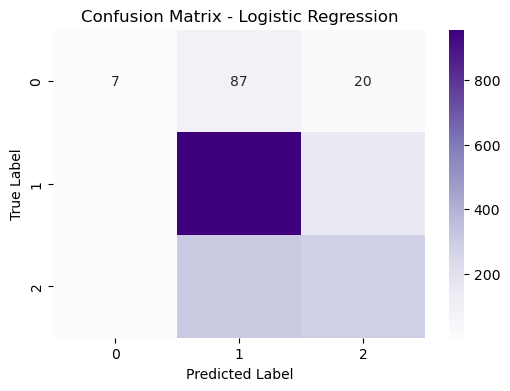

In [47]:
# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## Naives Bayes

In [49]:
# Evaluate performance
print("Naive Bayes Results")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Results
Accuracy: 0.6719955898566703

Classification Report:
               precision    recall  f1-score   support

    negative       0.67      0.04      0.07       114
     neutral       0.69      0.88      0.77      1106
    positive       0.61      0.41      0.49       594

    accuracy                           0.67      1814
   macro avg       0.66      0.44      0.44      1814
weighted avg       0.66      0.67      0.64      1814



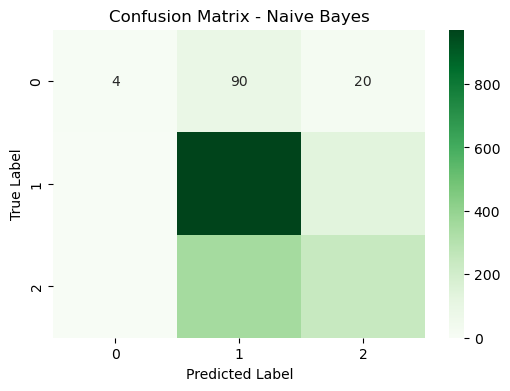

In [48]:
# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Random Forest

In [50]:
# Evaluate performance
print("Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Results
Accuracy: 0.6846747519294377

Classification Report:
               precision    recall  f1-score   support

    negative       0.65      0.18      0.28       114
     neutral       0.70      0.87      0.78      1106
    positive       0.64      0.43      0.51       594

    accuracy                           0.68      1814
   macro avg       0.66      0.49      0.52      1814
weighted avg       0.68      0.68      0.66      1814



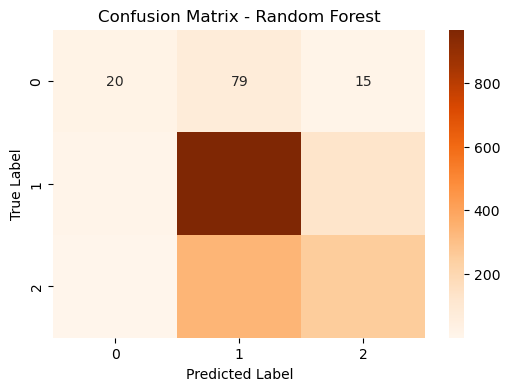

In [51]:
# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## SUPPORT VECTOR MACHINE (SVM)

In [54]:
# Evaluate performance
print("Support Vector Machine Results ")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

Support Vector Machine Results 
Accuracy: 0.6802646085997794

Classification Report:
               precision    recall  f1-score   support

    negative       0.50      0.25      0.34       114
     neutral       0.73      0.81      0.76      1106
    positive       0.59      0.53      0.56       594

    accuracy                           0.68      1814
   macro avg       0.61      0.53      0.55      1814
weighted avg       0.67      0.68      0.67      1814



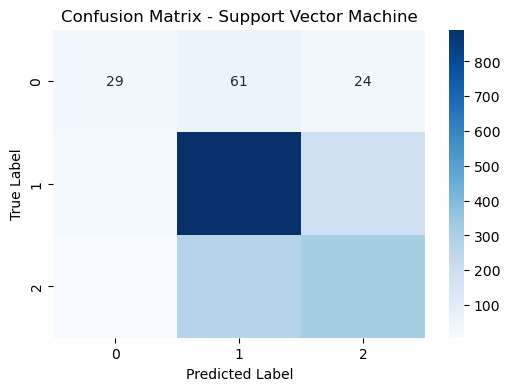

In [53]:
# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Support Vector Machine")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **6. RECOMMENDATION**

Based on the results, the Logistic Regression and SVM models performed the best for predicting tweet sentiments.
These models are accurate, easy to use, and generalize well to new data.
It is recommended to use these models for future tweet sentiment prediction tasks.
The analysis can also be improved by using a larger dataset or trying advanced models like BERT for better accuracy.

# **7. CONCLUSION**

This project successfully built a model to classify tweets as positive, negative, or neutral.
The results show that machine learning can effectively analyze public opinions about Apple and Google products.
Text cleaning and feature extraction were key steps in improving model performance.
Overall, the study provides useful insights into how people feel about technology brands on social media.